# Avraham et al. 2021 - Reexposure to a sensorimotor perturbation produces opposite effects on explicit and implicit learning processes

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 

In [2]:
def simExperiment(perturbation_schedule, A_f=0.92, A_s=0.996, B_f=0.3, B_s=0.04):
    '''
    Simulate experiment while showing slow and fast learning 

    INPUTS:
    perturbation_schedule: size of perturbation 
    A_f: fast retention factor
    A_s: slow retention factor
    B_f: fast learning rate 
    B_s: slow learning rate 

    OUTPUT:
    fast: fast process 
    slow: slow process 
    net: net processs
    '''
    # ICs
    x_1 = 0
    x_2 = 0
    net = [0]
    fast = [0]
    slow = [0]
    count = 0
    for t, p in enumerate(perturbation_schedule):
        # calculate error 
        er = p - net[count]
        fast.append((A_f * x_1) + (B_f * er))
        slow.append((A_s * x_2) + (B_s * er))
        net.append(fast[count] + slow[count])
        # update 
        x_1 = fast[count]
        x_2 = slow[count]
        count += 1

    return fast, slow, net

In [3]:
def showSimExp(perturbation_schedule, fast, slow, net, initialL, reL):
    '''
    Visualize experiment and individual processes 

    INPUTS:
    perturbation_schedule: perturbation schedule 
    fast: fast process component 
    slow: slow process component 
    net: net process component 

    OUTPUT:
    Visaulization of simulated experiment 
    '''

    fig = plt.figure(figsize=(10,6))
    plt.subplot(2,2,(1,2)) # overall process
    plt.plot(perturbation_schedule, linewidth=2, color='tab:blue')
    plt.plot(fast, linewidth=2, label='fast', color='tab:orange')
    plt.plot(slow, linewidth=2, label='slow', color='tab:green')
    plt.plot(net, linewidth=2, label='net', color='tab:purple')
    plt.legend(loc=0)
    plt.title('Experiment')
    plt.subplot(2,2,3)
    plt.plot(net[initialL[0]:initialL[1]], linewidth=2, label='initial', color='tab:purple')
    plt.plot(net[reL[0]:reL[1]], linestyle='--', linewidth=2, label='relearn', color='tab:purple')
    plt.legend(loc='lower right')
    plt.title('Initial learning and Relearning')
    plt.subplot(2,2,4) # just initial learning 
    plt.plot(fast[initialL[0]:initialL[1]], linewidth=2, color='tab:orange')
    plt.plot(slow[initialL[0]:initialL[1]], linewidth=2, color='tab:green')
    plt.plot(fast[reL[0]:reL[1]], linestyle='--', linewidth=2, color='tab:orange')
    plt.plot(slow[reL[0]:reL[1]], linestyle='--', linewidth=2, color='tab:green')
    # plt.legend(loc='lower right')
    plt.tight_layout()
    # general labels 
    # add a big axis, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    plt.xlabel('Trial #')
    plt.ylabel('Angle (deg)')
    plt.show()

## Classic design (quick onset learning 1 and relearning)

In [4]:
psched = np.zeros(shape=(1040,))
psched[0:160] = 0
psched[161:480] = 30
psched[481:600] = -30
psched[601:720] = 0
psched[721:1040] = 30

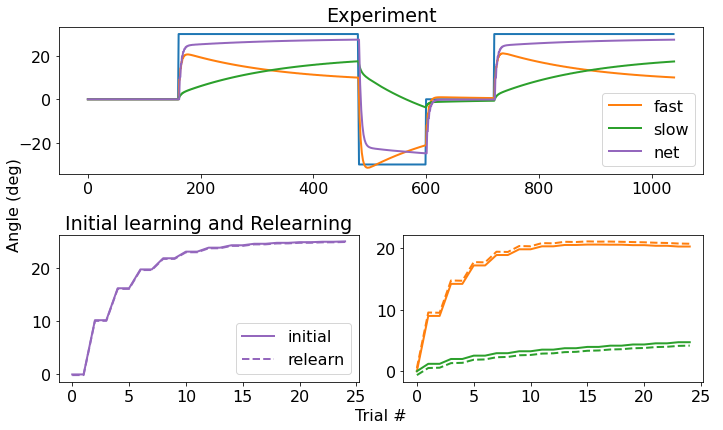

In [5]:
fast,slow,net = simExperiment(psched)
showSimExp(psched, fast, slow, net, (161,161+25), (721,721+25))

## Clamp

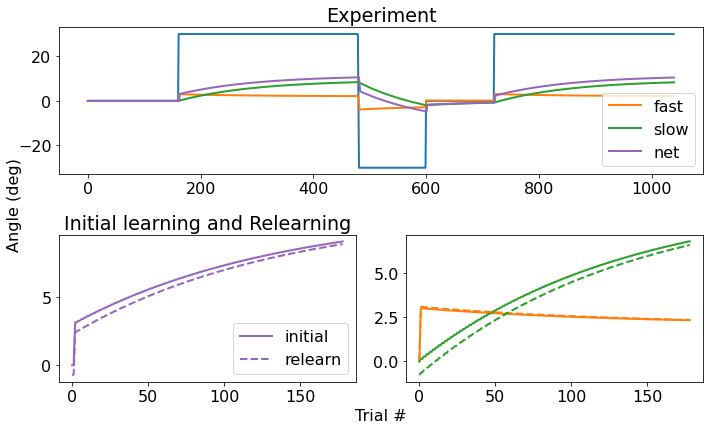

In [6]:
fast,slow,net = simExperiment(psched, A_f=0.1, B_f=0.1, A_s=0.99, B_s=0.005)
showSimExp(psched, fast, slow, net, (161,161+179), (721,721+179))

## Gradual_{strategy}

In [7]:
psched = np.zeros(shape=(1040,))
psched[0:160] = 0
psched[161:480] = np.linspace(0,30,480-161)
psched[481:600] = -30
psched[601:720] = 0
# psched[481:720] = 0
psched[721:1040] = 30

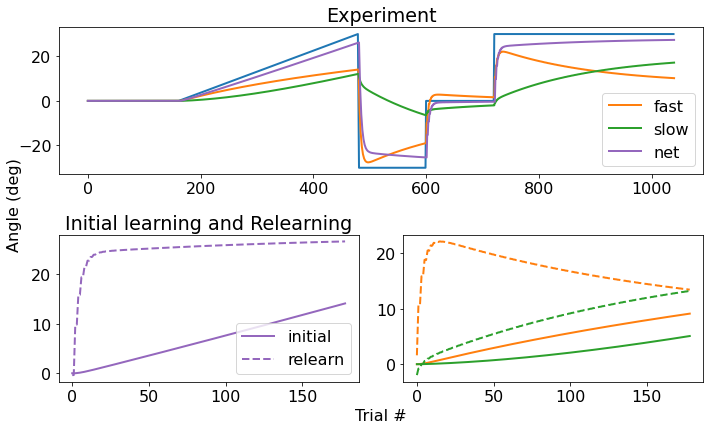

In [8]:
fast,slow,net = simExperiment(psched)
showSimExp(psched, fast, slow, net, (161,161+179), (721,721+179))

## Gradual_{implicit}

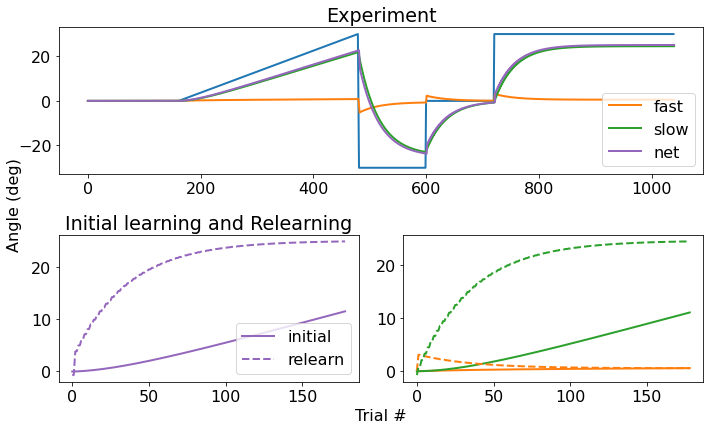

In [9]:
fast,slow,net = simExperiment(psched, A_f=0.1, B_f=0.1, A_s=0.99, B_s=0.05)
showSimExp(psched, fast, slow, net, (161,161+179), (721,721+179))